In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from uvb_abun_pairwise_compare import *

In [7]:
with open("/mnt/scratch/tairaeli/halo2392_pcw_2019/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    pcw_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_hm_2012/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    hm_dat = pickle.load(salsa_dat)

with open("/mnt/scratch/tairaeli/halo2392_fg_2009/redshift2.0/data/salsa_out_dict.pickle", "rb") as salsa_dat:
    fg_dat = pickle.load(salsa_dat)

In [9]:
pcw_v_hm = pcw_dat
pcw_v_hm["C II"]["HM_2012"] = hm_dat["C II"]["HM_2012"]
pcw_v_hm["C IV"]["HM_2012"] = hm_dat["C IV"]["HM_2012"]
pcw_v_hm["O VI"]["HM_2012"] = hm_dat["O VI"]["HM_2012"]

In [10]:
ion_list = ["C II", "C IV", "O VI"]
nrays = 4

pcw_v_hm_comp = pairwise_compare(pcw_v_hm, ion_list, nrays)

mx 15
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
id1 9
id2 9
id1 10
id2 10
id1 11
id2 11
id1 12
id2 12
id1 13
id2 13
id1 14
id2 13
mx 8
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 5
id2 6
id1 5
id2 7
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 4
id2 5
id1 4
id2 6
id1 4
id2 7
id1 4
id2 8
id1 4
id2 9
mx 6
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
mx 13
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 8
id2 8
id1 9
id2 9
id1 10
id2 10
id1 11
id2 11
id1 12
id2 12
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 7
id2 8
mx 10
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 4
id1 4
id2 5
id1 5
id2 6
id1 6
id2 7
id1 6
id2 8
id1 6
id2 9
mx 9
id1 0
id2 0
id1 1
id2 1
id1 2
id2 2
id1 3
id2 3
id1 4
id2 4
id1 5
id2 5
id1 6
id2 6
id1 7
id2 7
id1 

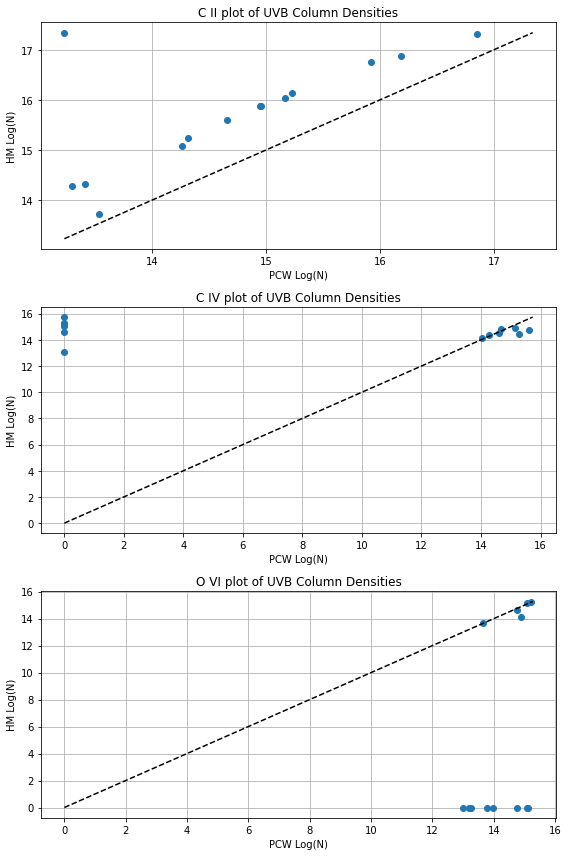

In [16]:
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

for i, ion in enumerate(ion_list):
    pcw_dens = pcw_v_hm_comp[1][ion][ray]
    hm_dens = pcw_v_hm_comp[2][ion][ray]
    
    small_dens = np.min([pcw_dens, hm_dens])
    large_dens = np.max([pcw_dens, hm_dens])
    
    sim_line = np.linspace(small_dens, large_dens, 20)
    
    ax[i].plot(pcw_dens,hm_dens, "o")
    ax[i].plot(sim_line,sim_line, "--", color = "black")
    ax[i].set_xlabel("PCW Log(N)")
    ax[i].set_ylabel("HM Log(N)")
    ax[i].set_title(f"{ion} plot of UVB Column Densities")
    ax[i].grid()
    

plt.tight_layout()

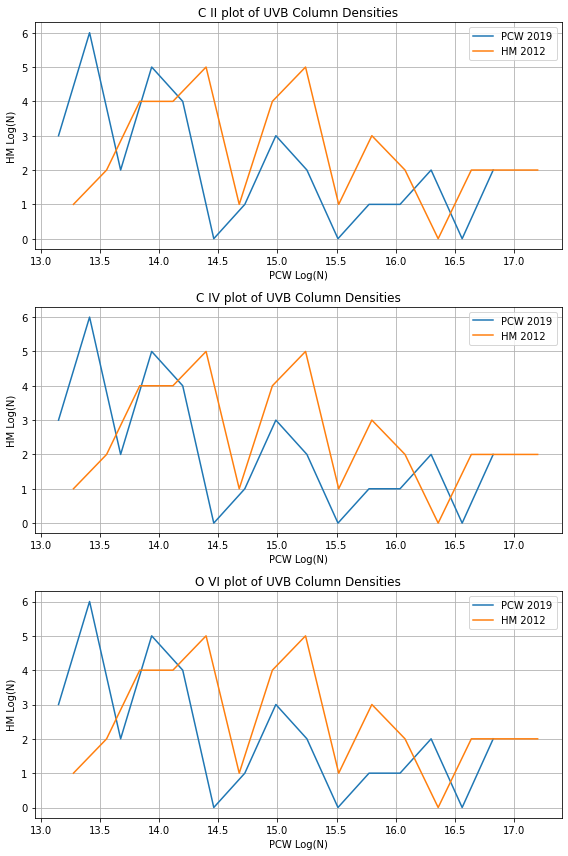

In [21]:
# generating histogram plots
fig, ax = plt.subplots(3,1, figsize = [8,12])

ray = 0

for i, ion in enumerate(ion_list):
    pcw_col_dens = pcw_v_hm["C II"]["PCW_2019"]["col_dens"]
    hm_col_dens = pcw_v_hm["C II"]["HM_2012"]["col_dens"]
    
    pcw_dens, pcw_bin_edge = np.histogram(pcw_col_dens, bins = 15)
    hm_dens, hm_bin_edge = np.histogram(hm_col_dens, bins = 15)
    
    pcw_bin_center = 0.5 * (pcw_bin_edge[1:] + pcw_bin_edge[:-1])
    
    hm_bin_center = 0.5 * (hm_bin_edge[1:] + hm_bin_edge[:-1])
    
    ax[i].plot(pcw_bin_center, pcw_dens, label = "PCW 2019")
    ax[i].plot(hm_bin_center, hm_dens, label = "HM 2012")
    ax[i].set_xlabel("PCW Log(N)")
    ax[i].set_ylabel("HM Log(N)")
    ax[i].set_title(f"{ion} plot of UVB Column Densities")
    ax[i].legend()
    ax[i].grid()
    

plt.tight_layout()